In [2]:
import os,sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Training
4
6
8
Plotting


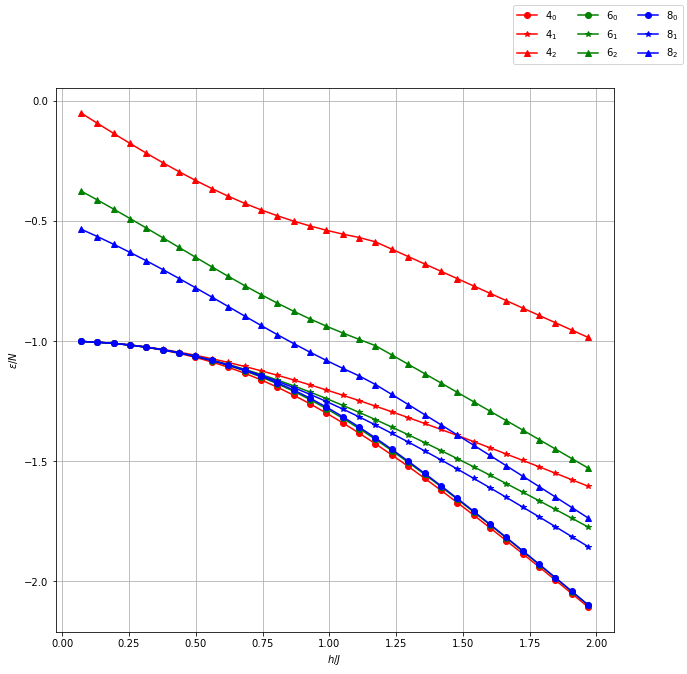

In [41]:
_N = [4,6,8]
_h = np.linspace(7e-2,2,64)
J = 1

X,Y,Z,I = np.array([[0,1],[1,0]]),np.array([[0,-1j],[1j,0]]),np.array([[1,0],[0,-1]]),np.array([[1,0],[0,1]])
def tensorprod(a):
    out = a[0]
    for i in range(1,len(a)):
        out = np.kron(out,a[i])
    return out

train = 1
levels = 3
subplots = 1
eps = 30

print('Training')

if train:    
    data = {}
    for N in _N:
        print(N)
        for h in _h:

    #         print(N,h)
            H = [
                *[[(1j*(J)**(1./2))*Z if k in [i,j] else I for k in range(N)] for i in range(N) for j in [(i+1)%N]],
                *[[(-(h)**(1./1))*X if k in [i] else I  for k in range(N)] for i in range(N)]
                ]
            H = np.sum([tensorprod(u).real for u in H],0)

            eigenvalues,eigenvectors = np.linalg.eigh(H)
            eigenvalues = np.unique(eigenvalues.round(10))


            data[(N,h)] = eigenvalues[:100]

            
print('Plotting')


# fig,axes = plt.subplots(1,levels)
fig,axes = plt.subplots(subplots)

for N in _N:
    e = {h: (np.unique(data[(N,h)].round(eps))/N)[:levels] for h in _h}
    for i in range(0,levels):
#         ax = axes[i]
        ax = axes
        x = _h[::2]
        y = [e[h][i] for h in _h][::2]
        ax.plot(x,y,marker=['o','*','^'][i],label=r'${%d}_{%d}$'%(N,i),color=['r','g','b'][_N.index(N)])


for i in range(subplots):
#     ax = axes[i]
    ax = axes    
    ax.set_xlabel('$h / J$');
    ax.set_ylabel('$\epsilon/N$');
    ax.grid(True);
fig.set_size_inches(10,10);
fig.subplots_adjust(wspace=2);
fig.legend(ncol=levels);
